In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import perf_counter

In [2]:
train= pd.read_csv('E:/HR/aug_train.csv')

In [3]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [4]:
train['gender'] = train['gender'].apply(gender_to_numeric)
train['relevent_experience'] = train['relevent_experience'].apply(rel_experience)
train['enrolled_university'] = train['enrolled_university'].apply(enrollment)
train['education_level'] = train['education_level'].apply(edu_level)
train['major_discipline'] = train['major_discipline'].apply(major)
train['experience'] = train['experience'].apply(experience)
train['company_type'] = train['company_type'].apply(company_t)
train['company_size'] = train['company_size'].apply(company_s)
train['last_new_job'] = train['last_new_job'].apply(last_job)
train['city'] = train['city'].apply(city)

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,11561,2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0.0,0.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,0,0.920,1.0,1,0.0,0.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,0,0.920,1.0,1,0.0,0.0,0.0,21.0,5.0,0.0,4.0,44,0.0
19156,5756,33,0.802,1.0,1,0.0,2.0,NaN,0.0,6.0,0.0,2.0,97,0.0


In [5]:
#为方便，直接用均值填充
train['gender'] = train['gender'].fillna((train['gender'].mean()))
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mean()))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mean()))
train['company_size'] = train['company_size'].fillna((train['company_size'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))
train['education_level'] = train['education_level'].fillna((train['education_level'].mean()))
train['experience'] = train['experience'].fillna((train['experience'].mean()))
train['last_new_job'] = train['last_new_job'].fillna((train['last_new_job'].mean()))

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [6]:
ss = StandardScaler()
Y = train['target']
X = train.drop(columns=['target'])
X = ss.fit_transform(X)#特征标准化
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [8]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

In [11]:
%%time
from time import perf_counter
start = perf_counter()
print("运行时间是: {:.5f}s".format(perf_counter() - start))

运行时间是: 0.00001s
Wall time: 0 ns


In [33]:
Classifier_model = [SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),Perceptron()]#KNeighborsClassifier()
# method = [BaggingClassifier(Classifier),AdaBoostClassifier(Classifier),StackingClassifier(Classifier)]

In [34]:
for i in Classifier_model:
    start = perf_counter()
    bag = BaggingClassifier(base_estimator=i,
                        n_estimators=10,
                           n_jobs = -1)
    bag.fit(X_train, Y_train)
    pre_bag=bag.predict(X_test)
    print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_bag))#输出ACC
#     confusion_ada = confusion_matrix(Y_test,pre_bag)
#     print('混淆矩阵:\n{}'.format(confusion_ada))#测试集混淆矩阵
#     print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_bag))#AUC
    print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_bag))#召回率
    print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_bag))#f分pre_bag
    print("运行时间是: {:.5f}s".format(perf_counter() - start))
    print('*'*30)

准确率ACC: 0.7784
召回率Recall: 0.3945
F1-score: 0.4731
运行时间是: 28.50283s
******************************
准确率ACC: 0.7575
召回率Recall: 0.5200
F1-score: 0.5196
运行时间是: 0.18076s
******************************
准确率ACC: 0.7714
召回率Recall: 0.3738
F1-score: 0.4520
运行时间是: 0.17091s
******************************
准确率ACC: 0.7630
召回率Recall: 0.3876
F1-score: 0.4521
运行时间是: 0.21018s
******************************
准确率ACC: 0.7557
召回率Recall: 0.2828
F1-score: 0.3687
运行时间是: 0.18478s
******************************


In [12]:
Classifier_model

[SVC(),
 GaussianNB(),
 LogisticRegression(),
 DecisionTreeClassifier(),
 Perceptron()]

In [40]:
for i in Classifier_model:
    start = perf_counter()
    bag = AdaBoostClassifier(algorithm='SAMME',
        base_estimator=i,
        n_estimators=10,
        random_state=10)
    bag.fit(X_train, Y_train)
    pre_bag=bag.predict(X_test)
    print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_bag))#输出ACC
#     confusion_ada = confusion_matrix(Y_test,pre_bag)
#     print('混淆矩阵:\n{}'.format(confusion_ada))#测试集混淆矩阵
#     print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_bag))#AUC
    print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_bag))#召回率
    print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_bag))#f分pre_bag
    print("运行时间是: {:.5f}s".format(perf_counter() - start))
    print('*'*30)

准确率ACC: 0.7477
召回率Recall: 0.0000
F1-score: 0.0000
运行时间是: 98.56738s
******************************
准确率ACC: 0.7575
召回率Recall: 0.4676
F1-score: 0.4931
运行时间是: 0.15050s
******************************
准确率ACC: 0.7658
召回率Recall: 0.4248
F1-score: 0.4779
运行时间是: 0.09646s
******************************
准确率ACC: 0.7105
召回率Recall: 0.4552
F1-score: 0.4424
运行时间是: 0.08846s
******************************
准确率ACC: 0.7328
召回率Recall: 0.3476
F1-score: 0.3962
运行时间是: 0.09782s
******************************


In [41]:
for i in range(5):
    Classifier_model = [('svm',SVC()),('GSNB',GaussianNB()),('Logist',LogisticRegression()),('DecisionTree',DecisionTreeClassifier()),('PLA',Perceptron())]
    Classifier_model1 = [SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),Perceptron()]    
    Classifier_model.pop(i)
    estimators = Classifier_model
    final_estimator = Classifier_model1.pop(i)
    start = perf_counter()
    stack = StackingClassifier(final_estimator=final_estimator,
        estimators=estimators,
                        n_jobs=-1,
                   )
    stack.fit(X_train, Y_train)
    pre_stack=stack.predict(X_test)
#     print(f'第一层分类器为{estimators},\n第二层分类器为{final_estimator}')
    print ('准确率ACC: %.4f' % metrics.accuracy_score(Y_test,pre_stack))#输出ACC
#     confusion_ada = confusion_matrix(Y_test,pre_stack)
#     print('混淆矩阵:\n{}'.format(confusion_ada))#测试集混淆矩阵
#     print ('AUC: %.4f' % metrics.roc_auc_score(Y_test,pre_stack))#AUC
    print ('召回率Recall: %.4f' % metrics.recall_score(Y_test,pre_stack))#召回率
    print ('F1-score: %.4f' %metrics.f1_score(Y_test,pre_stack))#f分pre_bag
    print("运行时间是: {:.5f}s".format(perf_counter() - start))
    print('*'*30)

准确率ACC: 0.7509
召回率Recall: 0.0855
F1-score: 0.1476
运行时间是: 11.24583s
******************************
准确率ACC: 0.7756
召回率Recall: 0.4676
F1-score: 0.5125
运行时间是: 21.91703s
******************************
准确率ACC: 0.7697
召回率Recall: 0.3517
F1-score: 0.4352
运行时间是: 20.83815s
******************************
准确率ACC: 0.7081
召回率Recall: 0.4276
F1-score: 0.4249
运行时间是: 20.70788s
******************************
准确率ACC: 0.4854
召回率Recall: 0.9145
F1-score: 0.4727
运行时间是: 20.55499s
******************************


In [15]:
Classifier_name = ['SVM','GSNB','Logist','DecisionTree','PLA']
method = ['Bagging','AdaBoost','Stacking']

In [16]:
def model_name(method,Classifier):
    name = f'{method}_{Classifier}'
    return name

In [17]:
names = []
for i in method:
    for j in Classifier_name:
        names.append(model_name(i,j))

In [38]:
names

['Bagging_SVM',
 'Bagging_GSNB',
 'Bagging_Logist',
 'Bagging_DecisionTree',
 'Bagging_PLA',
 'AdaBoost_SVM',
 'AdaBoost_GSNB',
 'AdaBoost_Logist',
 'AdaBoost_DecisionTree',
 'AdaBoost_PLA',
 'Stacking_SVM',
 'Stacking_GSNB',
 'Stacking_Logist',
 'Stacking_DecisionTree',
 'Stacking_PLA']

In [18]:
Classifiers = [SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),Perceptron()]

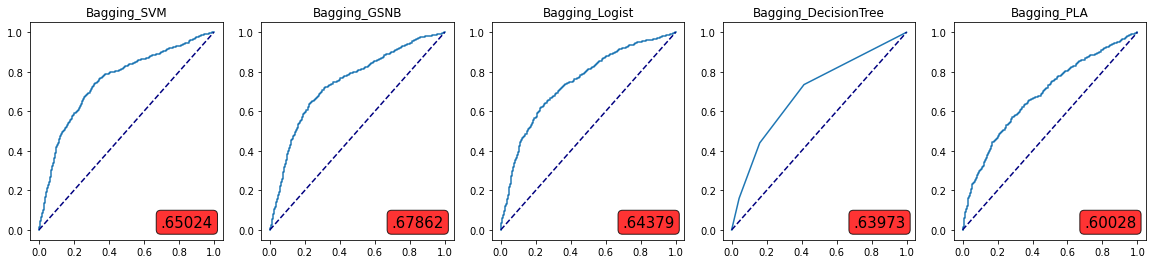

In [24]:
fig, axes = plt.subplots(1, 5,figsize=(20,4))
for est_idx, Classifier in enumerate(Classifiers):
    #定义子图位置
    ax = axes[est_idx]
    #将标题放在第一行的顶上
    ax.set_title(names[est_idx])
    #建模
    model = BaggingClassifier(base_estimator=Classifier,n_estimators=3,n_jobs = -1, random_state=10).fit(X_train,Y_train)
    pre_bag=model.predict(X_test)
    if hasattr(Classifier, "decision_function"):
        test_y_score = model.decision_function(X_test)
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_bag)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    else:
        test_y_score = model.predict_proba(X_test)[:, 1]
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_bag)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

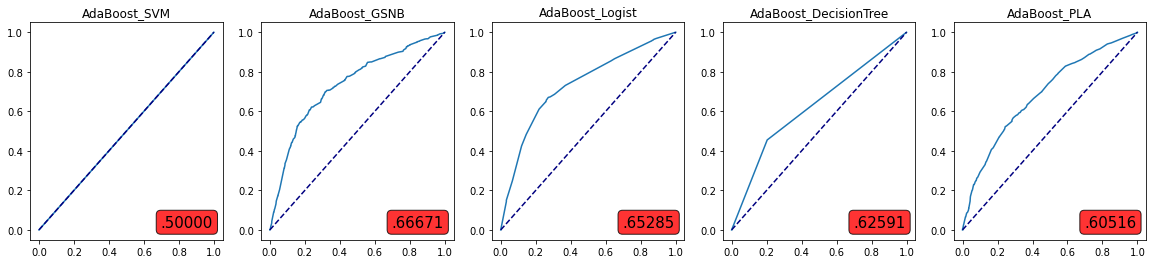

In [23]:
fig, axes = plt.subplots(1, 5,figsize=(20,4))
for est_idx, Classifier in enumerate(Classifiers):
    #定义子图位置
    ax = axes[est_idx]
    #将标题放在第一行的顶上
    ax.set_title(names[est_idx+5])
    #建模
    model = AdaBoostClassifier(algorithm='SAMME',base_estimator=Classifier, random_state=10).fit(X_train,Y_train)
    pre_ada=model.predict(X_test)
    if hasattr(Classifier, "decision_function"):
        test_y_score = model.decision_function(X_test)
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_ada)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    else:
        test_y_score = model.predict_proba(X_test)[:, 1]
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_ada)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [ ]:
for i in range(5):
    Classifier_model = [('svm',SVC()),('GSNB',GaussianNB()),('Logist',LogisticRegression()),('DecisionTree',DecisionTreeClassifier()),('PLA',Perceptron())]
    Classifier_model1 = [SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),Perceptron()]    
    Classifier_model.pop(i)
    estimators = Classifier_model
    final_estimator = Classifier_model1.pop(i)
    start = perf_counter()
    stack = StackingClassifier(final_estimator=final_estimator,
        estimators=estimators,
                        n_jobs=-1,
                           )
    stack.fit(X_train, Y_train)
    pre_stack=stack.predict(X_test)

In [28]:
[*enumerate(Classifier_model)]

[(0, ('svm', SVC())),
 (1, ('GSNB', GaussianNB())),
 (2, ('Logist', LogisticRegression())),
 (3, ('DecisionTree', DecisionTreeClassifier())),
 (4, ('PLA', Perceptron()))]

In [27]:
Classifier_model = [('svm',SVC()),('GSNB',GaussianNB()),('Logist',LogisticRegression()),('DecisionTree',DecisionTreeClassifier()),('PLA',Perceptron())]
Classifier_model1 = [SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),Perceptron()]    

In [26]:
for est_idx, Classifier in enumerate(Classifier_model):
    print(est_idx, Classifier)

0 ('svm', SVC())
1 ('GSNB', GaussianNB())
2 ('Logist', LogisticRegression())
3 ('DecisionTree', DecisionTreeClassifier())


[('GSNB', GaussianNB()), ('Logist', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('PLA', Perceptron())] SVC()
[('svm', SVC()), ('Logist', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('PLA', Perceptron())] GaussianNB()
[('svm', SVC()), ('GSNB', GaussianNB()), ('DecisionTree', DecisionTreeClassifier()), ('PLA', Perceptron())] LogisticRegression()
[('svm', SVC()), ('GSNB', GaussianNB()), ('Logist', LogisticRegression()), ('PLA', Perceptron())] DecisionTreeClassifier()
[('svm', SVC()), ('GSNB', GaussianNB()), ('Logist', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier())] Perceptron()


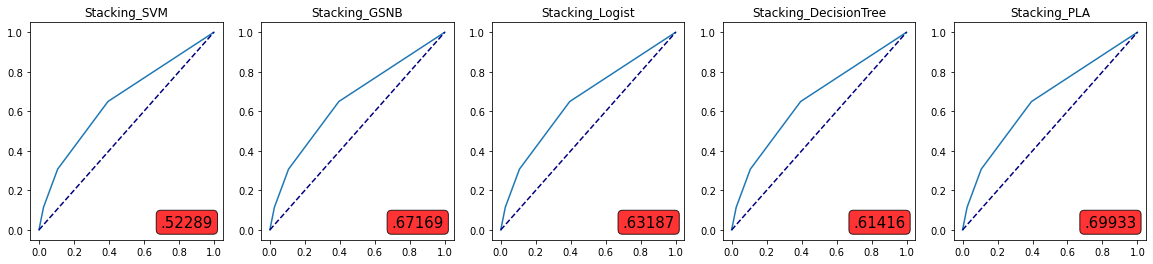

In [31]:
fig, axes = plt.subplots(1, 5,figsize=(20,4))
for i in range(5):
    #定义子图位置
    ax = axes[i]
    #将标题放在第一行的顶上
    ax.set_title(names[i+10])
    Classifier_model = [('svm',SVC()),('GSNB',GaussianNB()),('Logist',LogisticRegression()),('DecisionTree',DecisionTreeClassifier()),('PLA',Perceptron())]
    Classifier_model1 = [SVC(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),Perceptron()]    
    Classifier_model.pop(i)
    estimators = Classifier_model
    final_estimator = Classifier_model1.pop(i)
    start = perf_counter()
    stack = StackingClassifier(final_estimator=final_estimator,
        estimators=estimators,n_jobs=-1,)
    stack.fit(X_train, Y_train)
    pre_stack=stack.predict(X_test)
    if hasattr(Classifier, "decision_function"):
        test_y_score = model.decision_function(X_test)
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_stack)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    else:
        test_y_score = model.predict_proba(X_test)[:, 1]
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_stack)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    print(estimators,final_estimator)

In [ ]:
fig, axes = plt.subplots(1, 5,figsize=(20,4))
for est_idx, Classifier in enumerate(Classifiers):
    #定义子图位置
    ax = axes[est_idx]
    #将标题放在第一行的顶上
    ax.set_title(names[est_idx+10])
    #建模
    model = AdaBoostClassifier(algorithm='SAMME',base_estimator=Classifier, random_state=10).fit(X_train,Y_train)
    pre_ada=model.predict(X_test)
    if hasattr(Classifier, "decision_function"):
        test_y_score = model.decision_function(X_test)
        fpr,tpr,trhresholds = metrics.roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_ada)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    else:
        test_y_score = model.predict_proba(X_test)[:, 1]
        fpr,tpr,trhresholds = roc_curve(y_true=Y_test,y_score=test_y_score)
        roc_auc = metrics.auc(x=fpr,y=tpr)
        ax.plot(fpr,tpr)
        ax.text(0.95, 0.06, ('%.5f' % metrics.roc_auc_score(Y_test,pre_ada)).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='red')
                    #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')